# Montar el Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Librerias

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import scipy as sp
import scipy.signal as sig
from scipy import io
from scipy.fftpack import fft, ifft, fftfreq

# Proceso aleatorio

-0.2725536686904093 1.2462267369662277
0.019970675152447277 1.1870171168864319


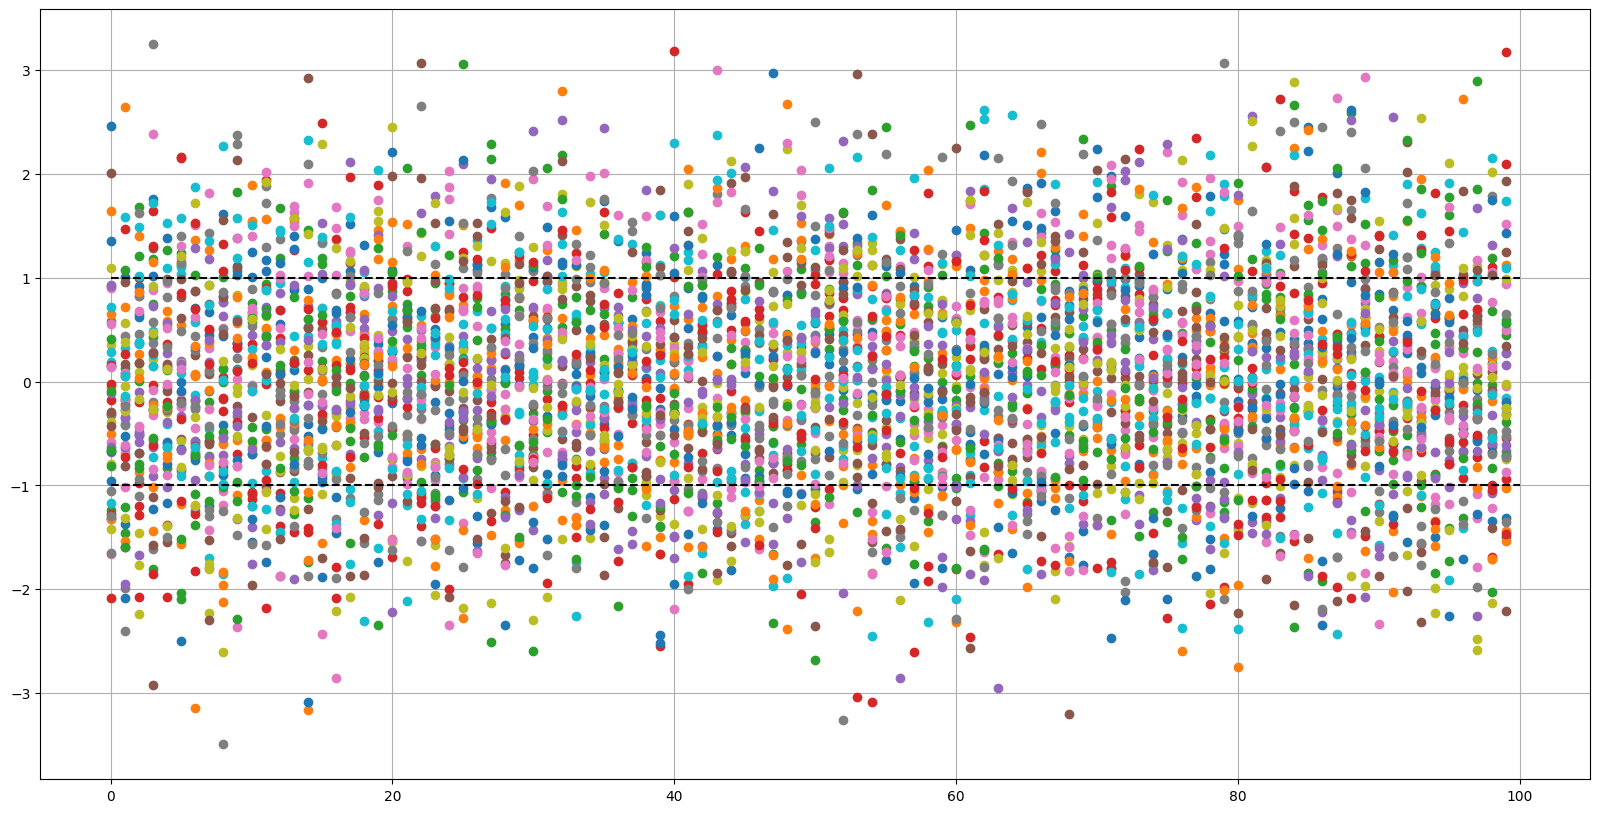

In [ ]:
k=100
n=np.arange(0,k)

normal=np.random.randn(n.shape[0],50)
print(np.mean(normal[8]),np.var(normal[8]))
print(np.mean(normal[5]),np.var(normal[5]))
plt.subplots(figsize=(20,10))
plt.plot(n,normal,'o')
plt.plot([0,n.shape[0]],[1,1],'k--')
plt.plot([0,n.shape[0]],[-1,-1],'k--')
plt.grid()

# Autocorrelación

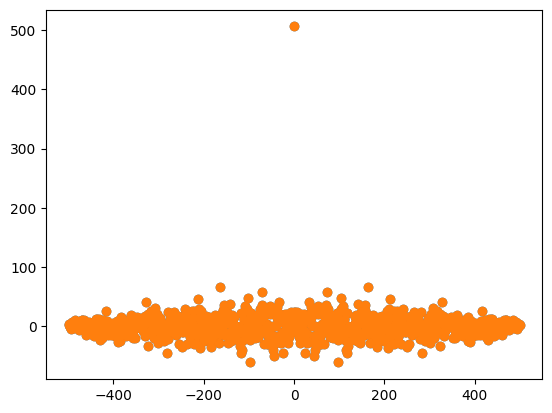

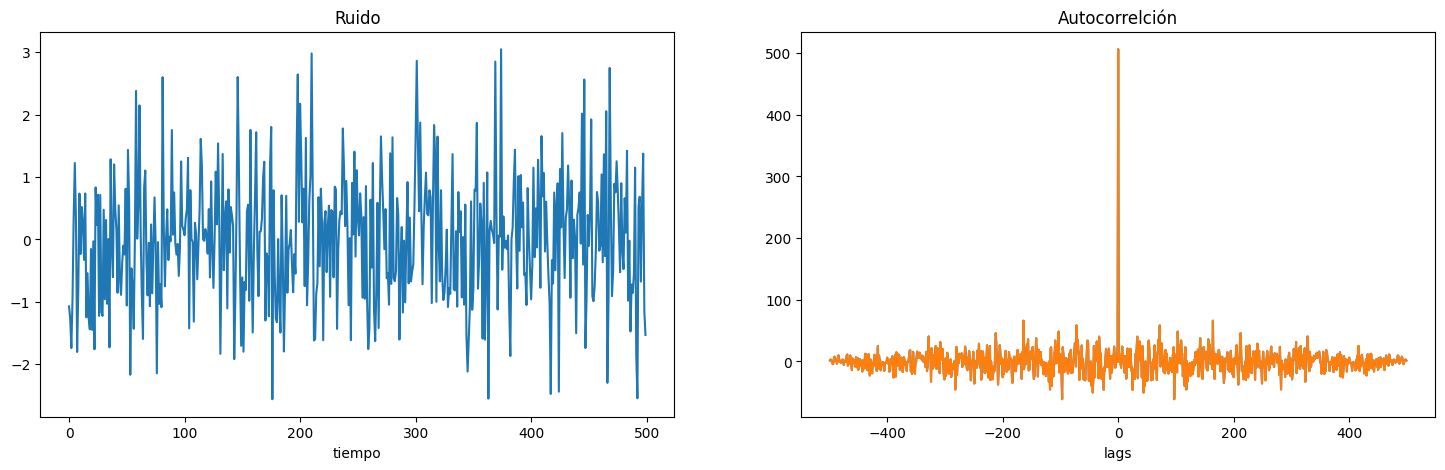

In [ ]:
mean = 0
std = 1
n_noise = 500

noise = np.random.normal(mean, std, n_noise)
c1,l1=plt.xcorr(noise,noise,normed=False,usevlines=False, maxlags=499)[:2]
c2,l2=plt.xcorr((noise-mean),(noise-mean),normed=False,usevlines=False, maxlags=499)[:2]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(noise)
ax1.set_title("Ruido")
ax1.set_xlabel("tiempo")
ax2.plot(c1,l1)
ax2.set_title("Autocorrelción")
ax2.set_xlabel("lags")
ax2.plot(c2,l2)

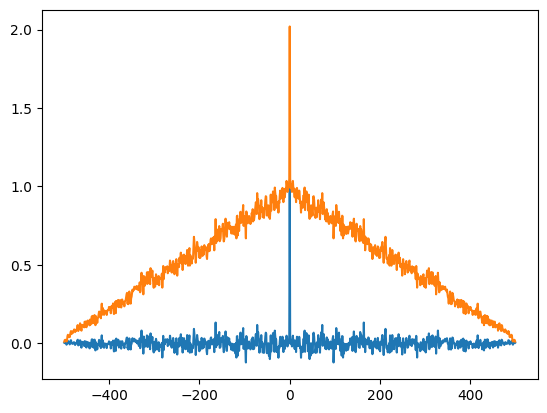

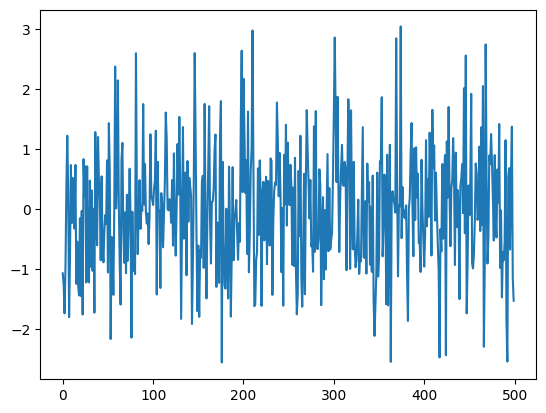

In [ ]:
lags = sig.correlation_lags(len(noise), len(noise))
ac=np.correlate(noise,noise,mode='full')/(n_noise)
acov=np.correlate((noise-1),(noise-1),mode='full')/(n_noise)
plt.plot(lags,ac)
plt.plot(lags,acov)
plt.show()
plt.plot((noise))

# Estacionariedad en sentido amplio

## **Desafio**
Realice un programa que evalue la estacionariedad de un proceso estocástico. Utilice ruido blanco como proceso y demuestre que cumple con las dos condiciones necesarias para ser ESA.
Escriban sus codigos en la linea a continuación


# Producto escalar

1.5707963267948966
6.123233995736766e-17
[[1.0000000e+00 1.3500312e-17]
 [1.3500312e-17 1.0000000e+00]]


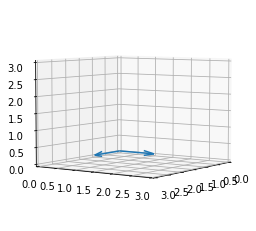

In [ ]:
#función para calcular el ángulo entre los vectores a travé del producto escalar

def theta (v1,v2):
  prod_esc=v1.dot(v2)
  den=np.linalg.norm(v1)*np.linalg.norm(v2)
  return np.arccos(prod_esc/den)


t0=0
tn=5.0
n=10000
ts=(tn-t0)/n
f1=2
f2=6
t=np.arange(0,tn,ts)
x1=np.cos(2*np.pi*t)
y1=np.sin(2*np.pi*t)
x=np.array([1.0, 0.0, 0.0])
y=np.array([0.0, 1.0, 0.0])
w=np.array([0, 0, 0])
print(theta(x,y))
print(np.cos(theta(x,y)))
k=np.array([[1, 0], [0, 1], [0, 0]]).T
print(np.corrcoef(x1,y1,rowvar=False))
#gráfico de señales como vectores
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.set_xlim(0,3)
ax.set_ylim(0,3)
ax.set_zlim(0,3)
ax.quiver(w[0],w[1],w[2],x[0],x[1],x[2])
ax.quiver(w[0],w[1],w[2],y[0],y[1],y[2])
ax.view_init(elev=5, azim=35) #cambia el punto de visualización
plt.show()

#Señales digitales senoidales, correlación y autocorrelación.

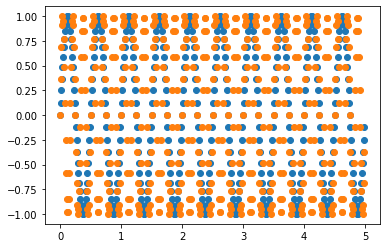

[[1.00000000e+00 1.55463175e-17]
 [1.55463175e-17 1.00000000e+00]]


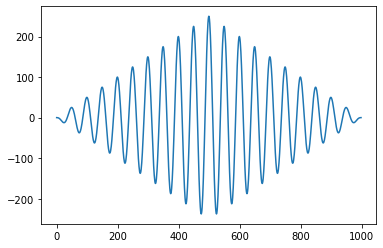

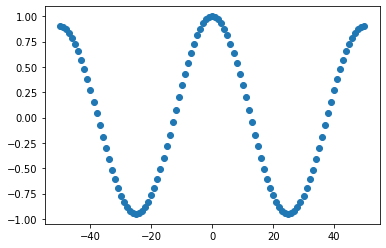

In [ ]:
from numpy.core.numeric import full

#funcion que calcula señales senoidales
def seno (t,fs):
  y=np.sin(2*np.pi*fs*t)
  return y

t0=0
tn=5.0
n=500
ts=(tn-t0)/n
f1=2
f2=6
t=np.arange(0,tn,ts)
m=len(t)
sig1=np.zeros(m,dtype=float)
sig2=np.zeros(m,dtype=float)

for i in range (0,m):
  sig1[i]=seno(t[i],f1)
  sig2[i]=seno(t[i],f2)
plt.plot(t,sig1,'o')
plt.plot(t,sig2,'o')
plt.show()
rxy=np.corrcoef(sig1,sig2) #Coeficientes de correlación de Pearson
print(rxy)
cross=np.correlate(sig1,sig1,'full') #auto correlación, para correlación crusada se utiliza la misma
                                      #función,pero se ingresan dos señales diferentes.
plt.plot(cross)
plt.show()
plt.xcorr(sig1,sig1,usevlines=False,maxlags=50)
plt.show()

## Autocorrelación

### Ruido Blanco

Media y varianza inses -0.0059766792910418065 0.010133362752665192
Media y varianza ses 0.0009528388528832294 0.0019725288429849087


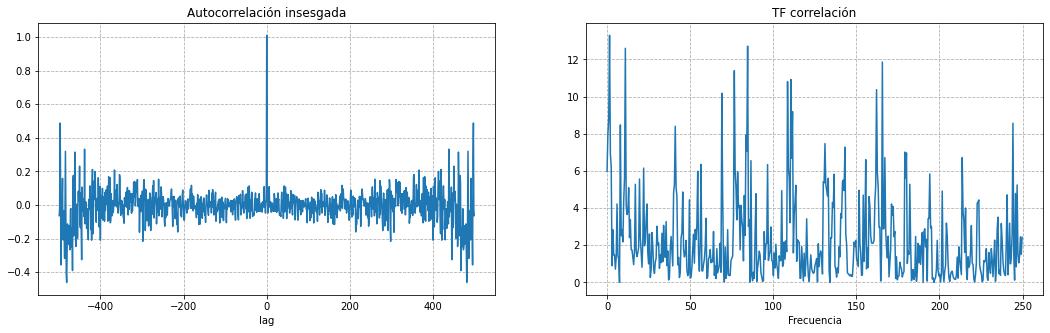

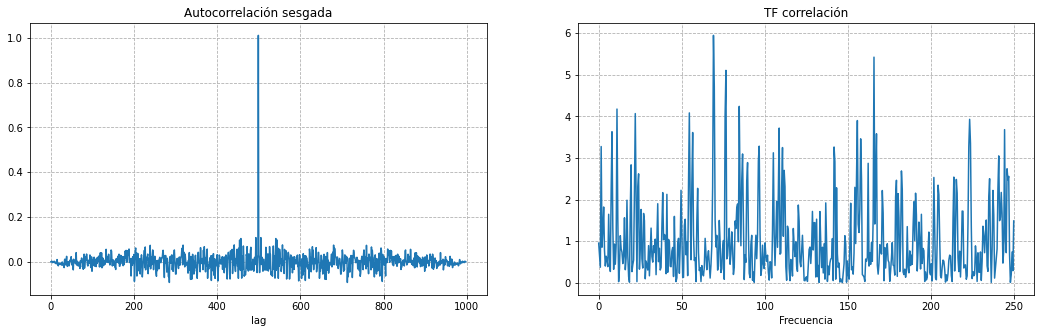

In [ ]:
# Estudio de autocorrelación como estimador

mean = 0
std = 1
num_noise = 500

noise = np.random.normal(mean, std, size=num_noise) #señal de ruido
l=np.arange(-len(noise)+1,len(noise)) #lag
rnn=np.convolve(noise,noise[::-1])

N=len(noise)
Rnn1=np.ndarray(shape=(len(l),), dtype=float)
for i in l:
  Rnn1[i]=rnn[i]/(N-np.abs(l[i])) # Autocorrelción insesgada

Snn1=fft(Rnn1)         # TF autocorrelcación
w1=fftfreq(len(Snn1))*N
# Gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(l,Rnn1)
ax1.grid(linestyle='--')
ax1.set_title("Autocorrelación insesgada")
ax1.set_xlabel("lag")
ax2.plot(w1[0:500],np.abs(Snn1[0:500]))
ax2.grid(linestyle='--')
ax2.set_title("TF correlación")
ax2.set_xlabel("Frecuencia")
print('Media y varianza inses', np.mean((Rnn1)), np.var(Rnn1))
Rnn2=rnn/(N)  #Autocorrelcación sesgada
Snn2=fft(Rnn2) #TF autocorrelación
w2=fftfreq(len(Snn2))*N
# Gráficos
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 5))
ax3.plot(Rnn2)
ax3.grid(linestyle='--')
ax3.set_title("Autocorrelación sesgada")
ax3.set_xlabel("lag")
ax4.plot(w2[0:500],np.abs(Snn2[0:500]))
ax4.grid(linestyle='--')
ax4.set_title("TF correlación")
ax4.set_xlabel("Frecuencia")
print('Media y varianza ses', np.mean(Rnn2), np.var(Rnn2))


### Senales senoidales

Media y Varianza ses 23.450410406162028 10326.304148619687
Media y Varianza inses 7.130379151444694 0.0


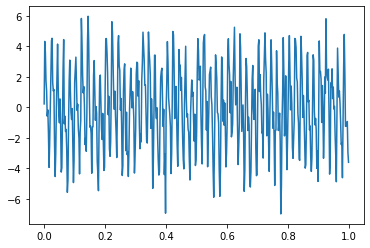

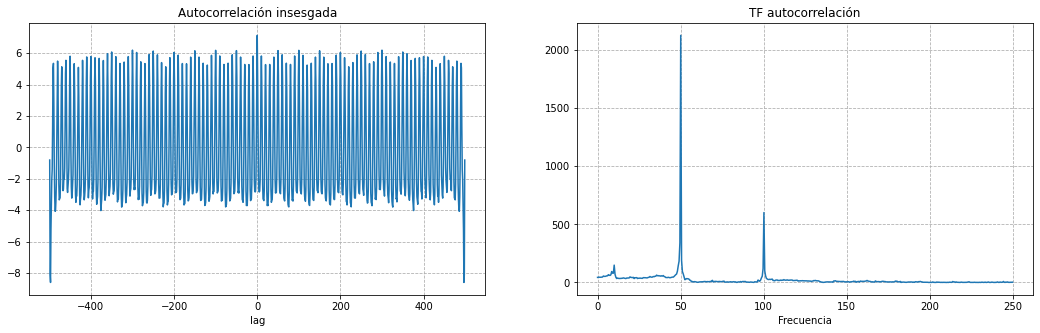

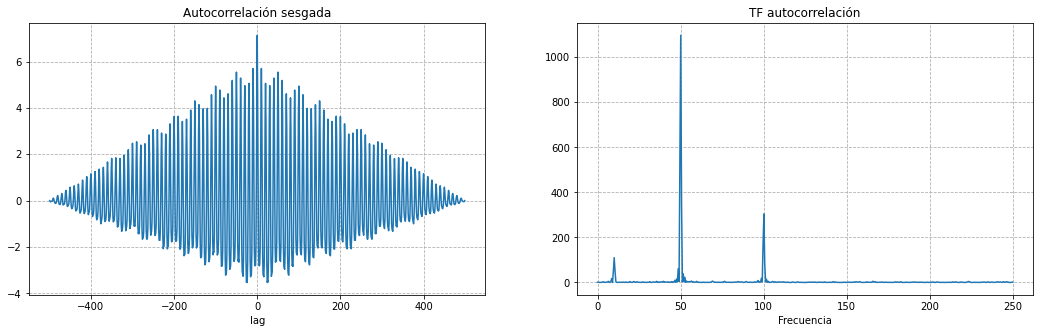

In [ ]:
# Estudio autocorrelación
# Funsión para calcular senos

def seno (t,f):
  y=np.sin(2*np.pi*f*t)
  return y

# Parametros
t0=0
tn=1.0
n=500
ts=(tn-t0)/n
f1=10
f2=50
f3=100
t=np.arange(0,tn,ts)
m=len(t)
# Iniciación de señales
sig1=np.zeros(m,dtype=float)
sig2=np.zeros(m,dtype=float)
sig3=np.zeros(m,dtype=float)
# Armado de las señales
for i in range (0,m):
  sig1[i]=seno(t[i],f1)
  sig2[i]=3*seno(t[i],f2)
  sig3[i]=1.5*seno(t[i],f3)

st1=sig1+sig2+sig3+noise # señal
plt.plot(t,st1)
l=np.arange(-len(st1)+1,len(st1))
rss=np.convolve(st1,st1[::-1])
N=len(st1)

Rss1=np.ndarray(shape=(len(l),), dtype=float)
for i in l:
  Rss1[i]=rss[i]/(N-np.abs(l[i])) # Autocorrelción insesgada

Sss1=fft(Rss1) #TF autocorrelación
w1=fftfreq(len(Sss1))*N
# Graficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(l,Rss1)
ax1.grid(linestyle='--')
ax1.set_title("Autocorrelación insesgada")
ax1.set_xlabel("lag")
ax2.plot(w1[0:500],np.abs(Sss1[0:500]))
ax2.grid()
ax2.grid(linestyle='--')
ax2.set_title("TF autocorrelación")
ax2.set_xlabel("Frecuencia")
print('Media y Varianza ses',np.mean(np.abs(Sss1)), np.var(np.abs(Sss1)))
Rss2=rss/(N)  # Autocorrelación sesgada
Sss2=fft(Rss2) #TF autocorrelación
w2=fftfreq(len(Snn2))*N
# Gráficos
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 5))
ax3.plot(l,Rss2)
ax3.grid(linestyle='--')
ax3.set_title("Autocorrelación sesgada")
ax3.set_xlabel("lag")
ax4.plot(w2[0:500],np.abs(Sss2[0:500]))
ax4.grid()
ax4.grid(linestyle='--')
ax4.set_title("TF autocorrelación")
ax4.set_xlabel("Frecuencia")
print('Media y Varianza inses', np.mean(np.abs(Sss2)), np.var(np.var(Sss2)))

# Abrir un archivo .mat

In [ ]:
data=sp.io.loadmat('/content/drive/MyDrive/Pract-corr/Chapter 2/data_c1.mat') #Lee el archivo .mat en la carpeta correspondiente
print(data.keys())
x=data['x']
print(len(x))